#K2BrightsCamp5

####A determination of the bright dwarf stars in the K2 Campaign 5 Field

###Introduction

In the K2 Mission the Kepler Spacecraft observes different fields along the ecliptic. The "selected", "wanted", and "proposed" [K2 fields](http://keplerscience.arc.nasa.gov/K2/images/CampaignSkyII.png) are shown in the below figure.

![Kepler K2 Fields](../figures/CampaignSkyIISm.png)

Campaign 5 will start on 2015.04.27 and last until 2015.07.13 and will a section of the sky between RAs of 120 - 140 degrees, and declinations between 9 and 24 degrees.

![K2 Campaign 5 Field](../figures/field5-final.png)

###Dependencies
- [K2fov](https://github.com/mrtommyb/K2fov/): Tom Barclay's tool for determining if targets are on K2 Silicon
- [hip2](https://github.com/JohnHBrock/hipparchos2-io): John Brock's port of the Hipparcos 2 data to Python

In [1]:
import K2fov
import hipparchos2io as hip2
from hipparchos2io.hip2 import reader as hipreader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#http://matplotlib.org/users/customizing.html
font = {'family' : 'Helvetica',
        'weight' : 'bold',
        'size'   : 12.}

plt.rc('font', **font)  # pass in the font dict as kwargs
axes = {'labelsize' : 12.,
        'linewidth' : 2.,
        'labelweight' : 'bold'}
plt.rc('axes', **axes)  # pass in the font dict as kwargs
plt.rc('text', usetex=False)


In [7]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
myfigsize = (12.0, 8.0)
myfontsize = 10.
plt.rcParams['figure.figsize'] = myfigsize

In [9]:
#determine the hip library directory:
hip2dir = '/'.join(hip2.__file__.split('/')[:-1])+'/'

###Extract Hipparcos Targets

In [10]:
#read in all the hipparcos data to a list of star objects:
stars = hipreader.get_stars_list(hip2dir+'hip2_data/hip2.dat')

In [11]:
#now cycle through the hip data, adding it to the DataFrame
stararr = [{'hipid': star.hipparcos_id,
            'ra': star.ra_radians,
           'dec': star.dec_radians,
           'plx': star.parallax_mas,
           'pmra': star.proper_motion_ra_mas_per_year,
           'pmdec': star.proper_motion_dec_mas_per_year,
           'era': star.ra_error_mas,
           'edec': star.dec_error_mas,
           'eplx': star.parallax_error_mas,
           'epmra': star.proper_motion_ra_error_mas_per_year,
           'epmdec': star.proper_motion_dec_error_mas_per_year,
           'mag': star.magnitude,
           'emag': star.magnitude_error,
           'bv': star.color_index,
           'ebv': star.color_index_error,
           'vi': star.VI_color_index} for star in stars]
    

In [12]:
#create a pandas DataFrame for the hip data:
hip_df = pd.DataFrame(stararr)

In [13]:
hip_df.head(3)

,bv,dec,ebv,edec,emag,eplx,epmdec,epmra,era,hipid,mag,plx,pmdec,pmra,ra,vi
0,0.482,0.019007,0.025,0.66,0.0020,1.33,0.75,1.25,1.29,1,9.2043,4.55,-1.19,-4.55,0.000016,0.55
1,0.999,-0.340319,0.002,0.53,0.0017,1.13,0.66,1.22,0.95,2,9.4017,20.85,-1.31,182.88,0.000066,1.04
2,-0.019,0.678222,0.004,0.21,0.0006,0.36,0.27,0.34,0.31,3,6.6081,2.26,-3.43,4.27,0.000087,0.00


In [14]:
hip_df['absmag'] = hip_df['mag'] - 5. * np.log10(100./hip_df['plx'])

In [15]:
len(hip_df)

117955

####Constrain to Nearby Stars (within 50 pc)

In [16]:
hip_close = hip_df[((hip_df['plx'] >= 10) & (hip_df['bv'] != 0))]

In [17]:
len(hip_close)

22710

(20, -5)

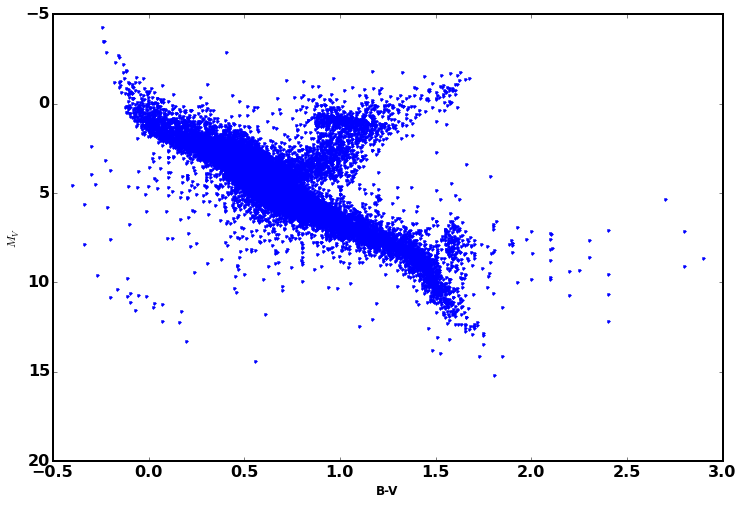

In [19]:
plt.plot(hip_close['bv'], hip_close['absmag'], '.')
plt.xlabel('B-V')
plt.ylabel('$M_{V}$')
plt.ylim([20, -5])

####Now Constrain to bright cool dwarfs in the Campaign 5 Field

A few requirements on our target selection:
- Needs to be bright (vmag < 7) to observe it with CHIRON
- Needs to be in the Campaign 5 field:
    - RA > 120 degrees
    - RA < 140 degrees
    - dec > 9
    - dec < 24
- Needs to be observable by CHIRON (dec < 20)
- Needs to be a dwarf (M_V > 1.1)
- Needs to be cooler than G2 (BV > 0.63)

In [21]:
#convert the ras to radians
ralorad = 120 / 180. * np.pi
rahirad = 140 / 180. * np.pi
dechirad = 20 / 180. * np.pi
declorad = 9 / 180. * np.pi
hip_camp = hip_close[((hip_close['mag'] < 8.) & 
                      (hip_close['ra'] > ralorad) &
                      (hip_close['ra'] < rahirad) &
                      (hip_close['dec'] < dechirad) &
                      (hip_close['dec'] > declorad) & 
                      (hip_close['bv'] > 0.63) &
                      (hip_close['absmag'] > 1.1))].copy()
len(hip_camp)

11

(20, -5)

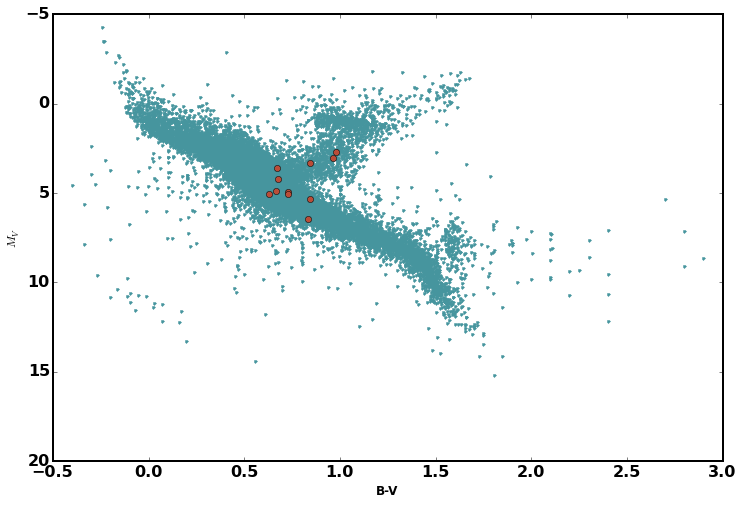

In [23]:
plt.plot(hip_close['bv'], hip_close['absmag'], '.', color='#46959E')
plt.plot(hip_camp['bv'], hip_camp['absmag'], 'o', color='#BA4C37')
plt.xlabel('B-V')
plt.ylabel('$M_{V}$')
plt.ylim([20, -5])

In [24]:
hip_camp

,bv,dec,ebv,edec,emag,eplx,epmdec,epmra,era,hipid,mag,plx,pmdec,pmra,ra,vi,absmag
39372,0.845,0.214500,0.019,1.36,0.0018,1.43,1.96,1.81,1.50,39495,7.9171,30.12,-148.05,78.06,2.113528,0.89,5.311375
39383,0.632,0.161755,0.015,0.44,0.0011,0.63,0.51,0.59,0.51,39506,7.3816,34.01,17.49,268.40,2.114007,0.70,5.039633
40008,0.667,0.288407,0.007,0.45,0.0013,0.65,0.52,0.64,0.58,40133,7.4823,30.41,-258.66,-42.38,2.145971,0.73,4.897382
40009,0.844,0.234674,0.011,0.34,0.0013,0.49,0.46,0.68,0.49,40134,7.4326,15.05,-85.33,-125.24,2.145991,0.86,3.320282
40325,0.731,0.199518,0.013,0.41,0.0010,0.72,0.58,0.77,0.60,40452,7.8586,25.93,-232.90,-199.03,2.162268,0.78,4.927613
40634,0.674,0.247848,0.015,0.45,0.0012,0.88,0.86,1.13,0.83,40761,7.9997,17.43,25.95,34.91,2.178270,0.73,4.206187
42367,0.832,0.201130,0.008,0.37,0.0011,0.71,0.55,0.85,0.62,42499,7.7492,55.13,-501.23,-108.92,2.268263,0.87,6.456140
43318,0.669,0.267916,0.006,0.33,0.0010,0.51,0.41,0.67,0.52,43454,6.4999,26.10,74.83,-114.91,2.317036,0.73,3.583103
43777,0.966,0.305108,0.015,0.48,0.0015,0.70,0.59,1.00,0.83,43915,7.7859,11.22,-20.33,32.18,2.342084,0.95,3.035864
44702,0.982,0.208539,0.010,0.35,0.0011,0.71,0.31,0.85,0.63,44843,7.4566,11.18,-81.26,-88.88,2.392019,0.96,2.698809


In [25]:
hip_camp['radeg'] = hip_camp['ra'] * 180. / np.pi
hip_camp['decdeg'] = hip_camp['dec'] * 180. / np.pi

In [26]:
hip_camp[['radeg', 'decdeg', 'mag']]

,radeg,decdeg,mag
39372,121.096234,12.289947,7.9171
39383,121.123691,9.267887,7.3816
40008,122.955057,16.524490,7.4823
40009,122.956224,13.445811,7.4326
40325,123.888845,11.431516,7.8586
40634,124.805698,14.200620,7.9997
42367,129.961904,11.523888,7.7492
43318,132.756385,15.350474,6.4999
43777,134.191541,17.481400,7.7859
44702,137.052567,11.948400,7.4566


##Checking on Silicon

There are two ways to do this:
1. (Simple way) run the K2onSilicon routine and have it read in a csv and write out to file
2. (Clean way) Copy the contents of K2onSilicon so that we can do things within the IPython notebook

In [134]:
#Method 1
fname = 'targsToCheck.csv'
hip_camp.to_csv(fname, columns = ['radeg', 'decdeg', 'mag'], index=False, header=False)

fieldnum = 5
K2fov.K2onSilicon(fname,fieldnum)

I made two files: targets_siliconFlag.csv and targets_fov.png


,hipid,radeg,decdeg,bv,mag,absmag,onSilicon
40634,40761,124.805698,14.200620,0.674,7.9997,4.206187,2
42367,42499,129.961904,11.523888,0.832,7.7492,6.456140,2
43777,43915,134.191541,17.481400,0.966,7.7859,3.035864,2


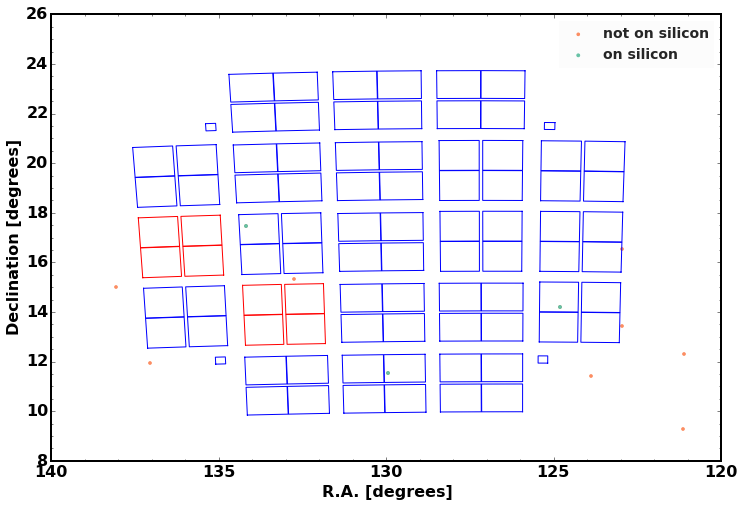

In [29]:
#Method 2
fieldnum = 5
ra_sources_deg, dec_sources_deg, mag = (hip_camp['radeg'].values,
                                       hip_camp['decdeg'].values,
                                       hip_camp['mag'].values)

from K2fov.K2onSilicon import getRaDecRollFromFieldnum
from K2fov.K2onSilicon import onSiliconCheck
from K2fov.K2onSilicon import nearSiliconCheck
import K2fov.fov as fov
import K2fov.projection as proj

ra_deg, dec_deg, scRoll_deg = getRaDecRollFromFieldnum(fieldnum)
fovRoll_deg = fov.getFovAngleFromSpacecraftRoll(scRoll_deg)
k = fov.KeplerFov(ra_deg, dec_deg, fovRoll_deg)
raDec = k.getCoordsOfChannelCorners()

onSilicon = map(onSiliconCheck,
    ra_sources_deg,dec_sources_deg,np.repeat(k,len(ra_sources_deg)))

nearSilicon = map(nearSiliconCheck,
    ra_sources_deg,dec_sources_deg,np.repeat(k,len(ra_sources_deg)))

onSilicon = np.array(onSilicon,dtype=bool)
nearSilicon = np.array(nearSilicon, dtype=bool)

#the plotting bit:
almost_black = '#262626'
light_grey = np.array([float(248)/float(255)]*3)
#ph = proj.Gnomic(ra_deg, dec_deg)
ph = proj.PlateCaree()
k.plotPointing(ph,showOuts=False,plot_degrees=False)
targets = ph.skyToPix(ra_sources_deg, dec_sources_deg)
targets = np.array(targets ) #* 180 / np.pi
fig = plt.gcf()
ax = fig.gca()
ax = fig.add_subplot(111)
#ax.scatter(*targets,s=2,label='not on silicon')
ax.scatter(*targets,color='#fc8d62',s=7,label='not on silicon')
ax.scatter(targets[0][onSilicon],
    targets[1][onSilicon],color='#66c2a5',s=8,label='on silicon')
ax.set_xlabel('R.A. [degrees]',fontsize=16)
ax.set_ylabel('Declination [degrees]',fontsize=16)
ax.invert_xaxis()
ax.minorticks_on()
legend = ax.legend(loc=0,
    frameon=True, scatterpoints=1)
rect = legend.get_frame()
rect.set_alpha(0.3)
rect.set_facecolor(light_grey)
rect.set_linewidth(0.0)
texts = legend.texts
for t in texts:
    t.set_color(almost_black)

siliconFlag = np.zeros_like(ra_sources_deg)

#prints zero if target is not on silicon
siliconFlag = np.where(nearSilicon,0,siliconFlag)

#prints a 2 if target is on silicon
siliconFlag = np.where(onSilicon,2,siliconFlag)

hip_camp['onSilicon'] = siliconFlag

hip_camp_good = hip_camp[hip_camp['onSilicon'] == 2]

hip_camp_good[['hipid', 'radeg', 'decdeg', 'bv', 'mag', 'absmag', 'onSilicon']]

## Conclusion

There are no stars brighter than 7.5 magnitude that fall on K2 Silicon that are observable by CHIRON in the Campaign 5 field of view. However, there are three targets that are brighter than 8th magnitude that fall on Silicon. I will add these for observation.